In [19]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

In [20]:
# Get the absolute path of the current file
current_file_path = Path('cluster_k_means.ipynb').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))
from data.input_data_1 import DatasetCreator


# Step 1: Create Datasets
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
points_dataset = dataset_creator.create_points_dataset()

In [21]:
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_points = points_dataset['X']

In [22]:
# Step 2: Create and Fit KMeans and MiniBatchKMeans models for make_blob dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_blob)
kmeans_labels = kmeans.predict(X_blob)

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans.fit(X_blob)
minibatch_kmeans_labels = minibatch_kmeans.predict(X_blob)

/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Step 3: Create and Fit KMeans and MiniBatchKMeans models on points dataset
kmeans_points = KMeans(n_clusters=3, random_state=42)
kmeans_points.fit(X_points)
kmeans_points_labels = kmeans_points.predict(X_points)

minibatch_kmeans_points = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans_points.fit(X_points)
minibatch_kmeans_points_labels = minibatch_kmeans_points.predict(X_points)

/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Step 4: Plot the Clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

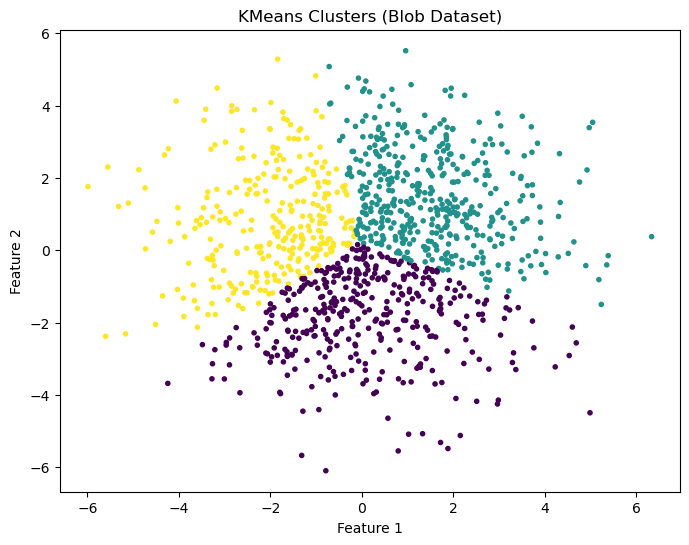

In [25]:
# Plot clusters for the blob dataset
plot_clusters(X_blob, kmeans_labels, 'KMeans Clusters (Blob Dataset)')

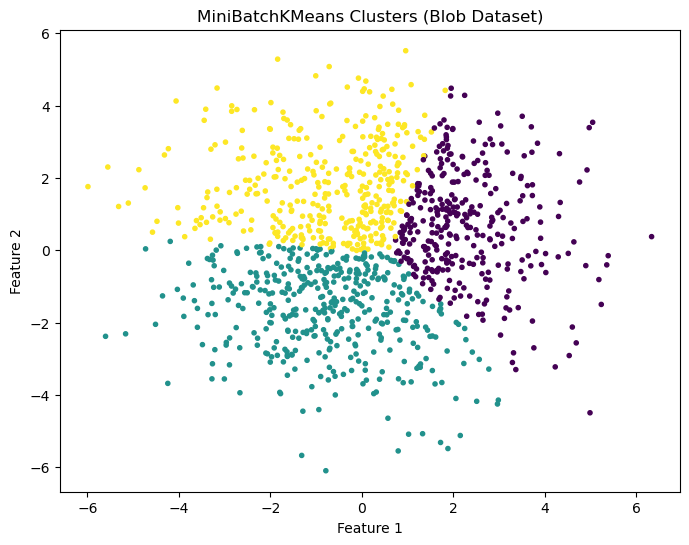

In [26]:
plot_clusters(X_blob, minibatch_kmeans_labels, 'MiniBatchKMeans Clusters (Blob Dataset)')

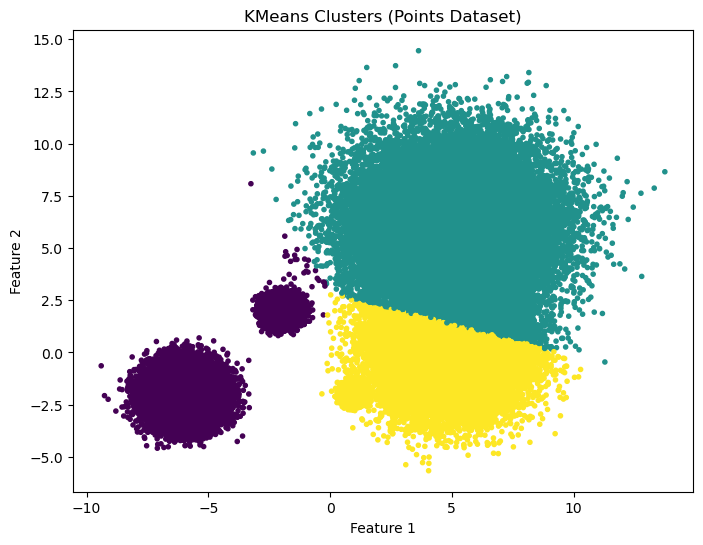

In [27]:
# Plot clusters for the points dataset
plot_clusters(X_points, kmeans_points_labels, 'KMeans Clusters (Points Dataset)')

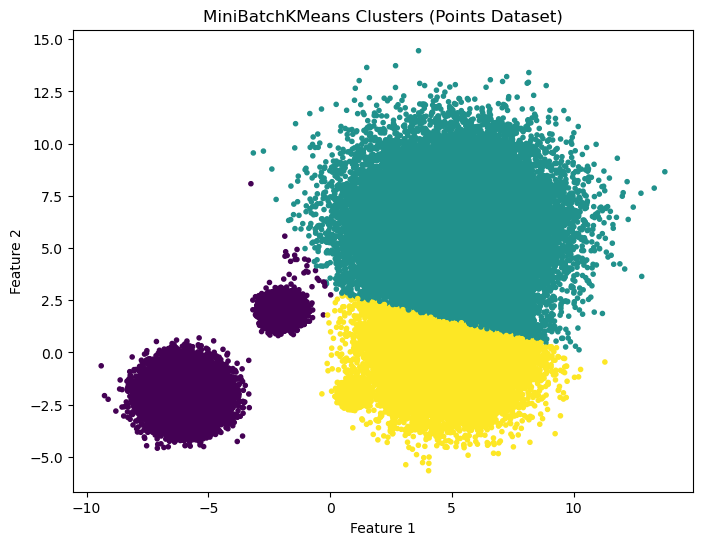

In [28]:
plot_clusters(X_points, minibatch_kmeans_points_labels, 'MiniBatchKMeans Clusters (Points Dataset)')

To create several alternative models by changing parameters like the number of clusters and distance metrics, and to visualize the cluster centers, you can extend the starter code. Below, I've added additional models with varying parameters and included the visualization of cluster centers.


In [29]:
# Step 1: Create and Fit KMeans and MiniBatchKMeans models with different parameters
models = {
    'KMeans_3_clusters': KMeans(n_clusters=3, random_state=42),
    'KMeans_4_clusters': KMeans(n_clusters=4, random_state=42),
    'KMeans_5_clusters': KMeans(n_clusters=5, random_state=42),
    'MiniBatchKMeans_3_clusters': MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100),
    'MiniBatchKMeans_4_clusters': MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=100),
    'MiniBatchKMeans_5_clusters': MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=100),
}

# Fit models on the blob dataset
labels_blob = {}
centers_blob = {}
for name, model in models.items():
    model.fit(X_blob)
    labels_blob[name] = model.predict(X_blob)
    centers_blob[name] = model.cluster_centers_

# Fit models on the points dataset
labels_points = {}
centers_points = {}
for name, model in models.items():
    model.fit(X_points)
    labels_points[name] = model.predict(X_points)
    centers_points[name] = model.cluster_centers_


/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ndungajr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nd

In [30]:
# Step 2: Plot the Clusters with Cluster Centers
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centers')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

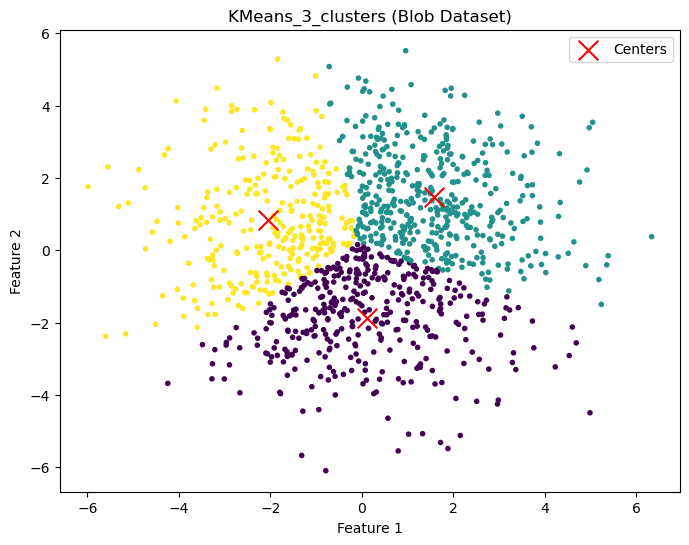

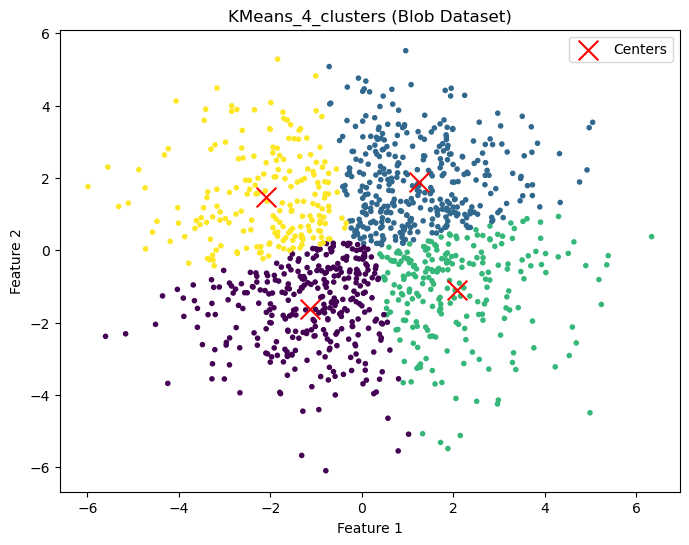

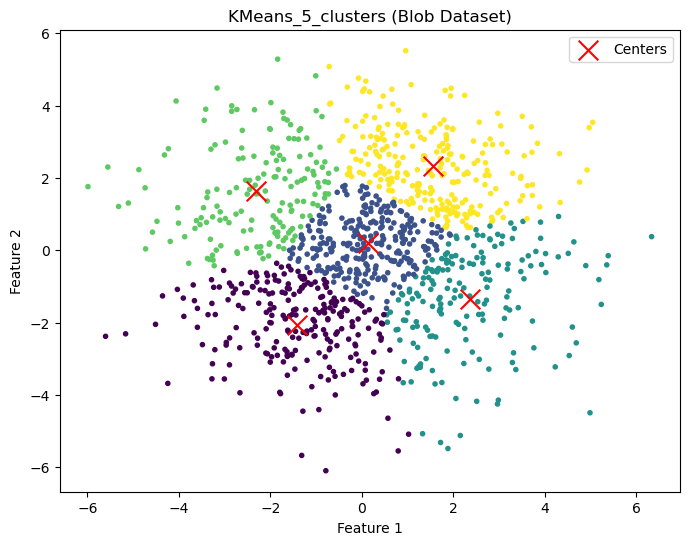

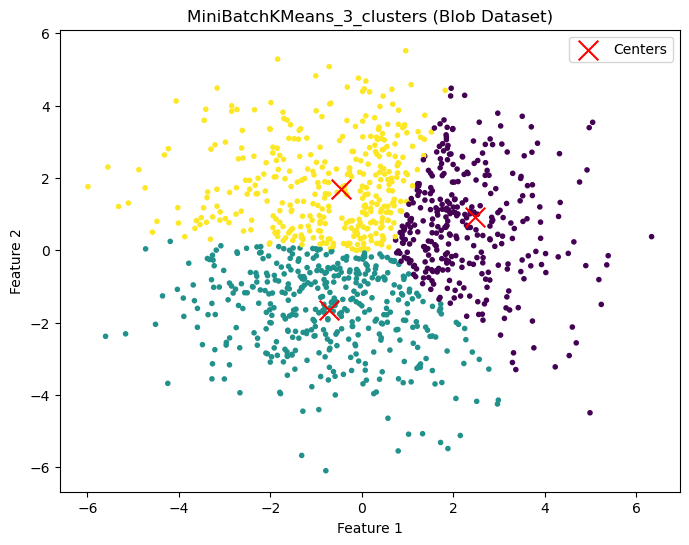

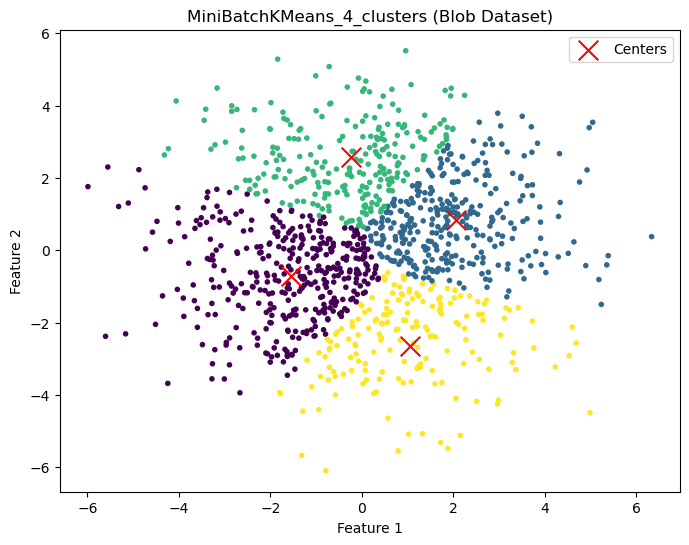

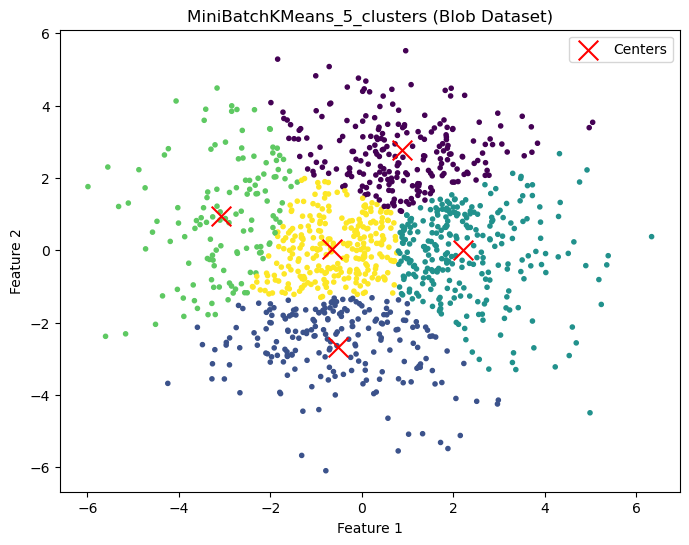

In [31]:
# Plot clusters for the blob dataset
for name in labels_blob.keys():
    plot_clusters(X_blob, labels_blob[name], centers_blob[name], f'{name} (Blob Dataset)')

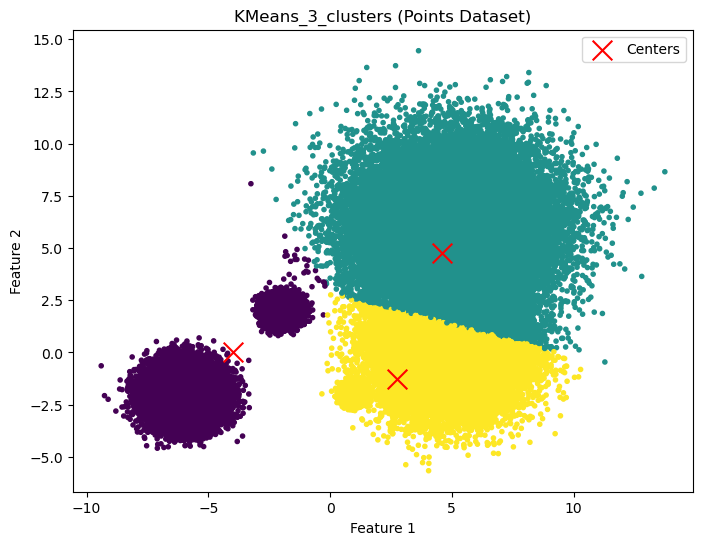

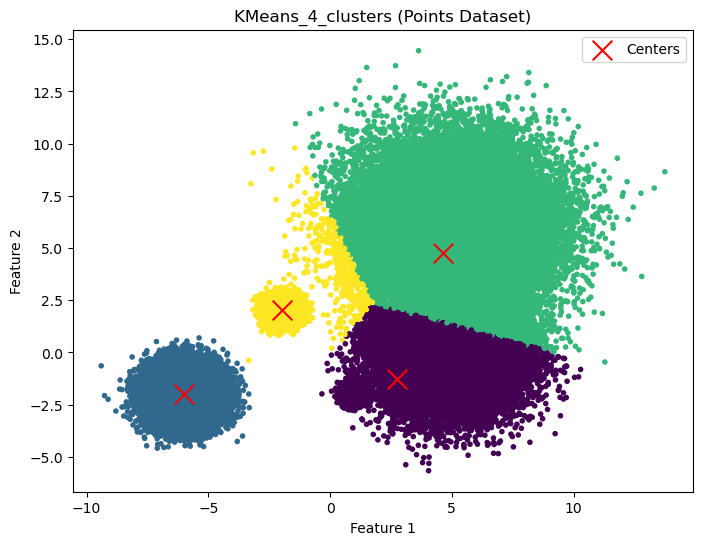

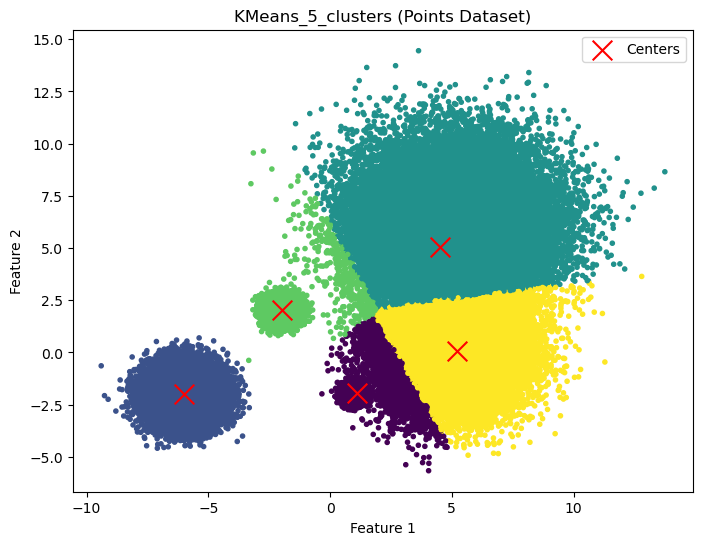

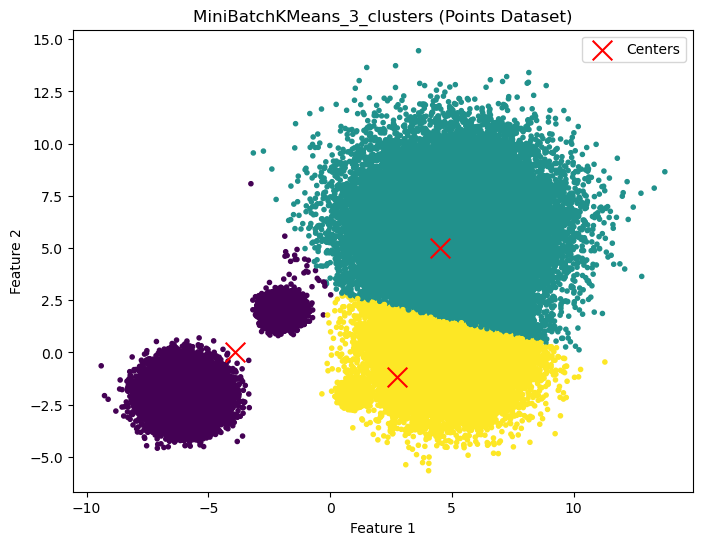

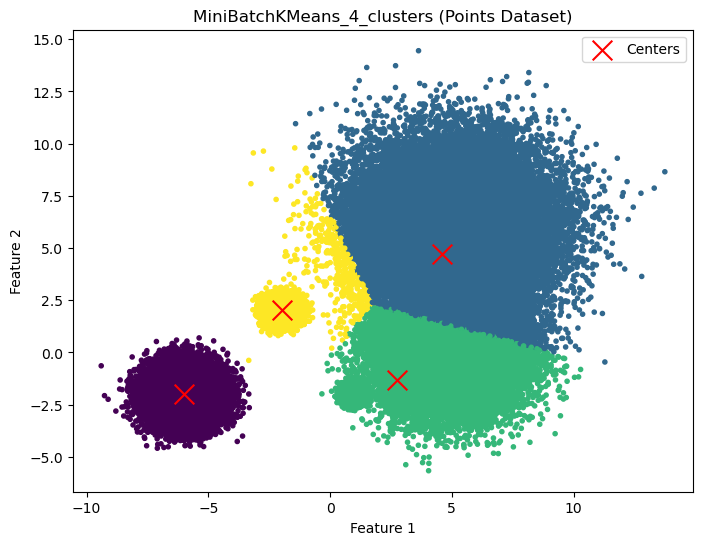

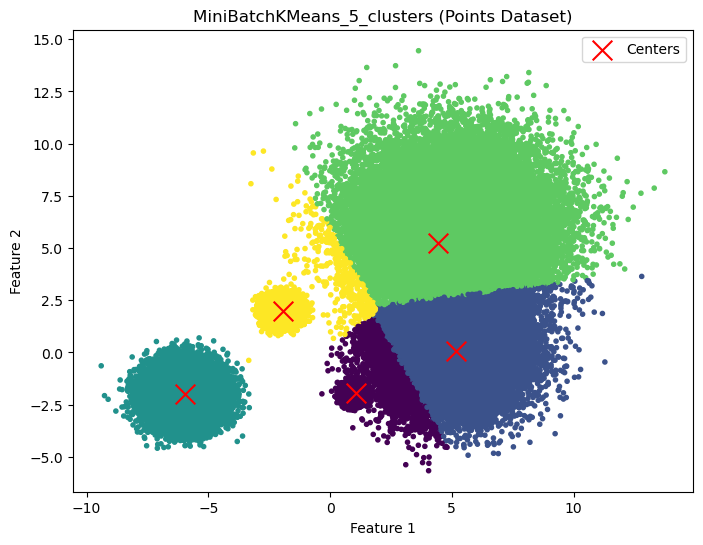

In [32]:
# Plot clusters for the points dataset
for name in labels_points.keys():
    plot_clusters(X_points, labels_points[name], centers_points[name], f'{name} (Points Dataset)')

Qn5: For each alternative model use qualitz metric from sklearn.metrics
Rand Index, Calinski-Harabasz Index, Davies-Bouldin index.

To evaluate the clustering models using quality metrics like Adjusted Rand Index, Calinski-Harabasz Index, and Davies-Bouldin Index. The following code includes these metrics for each model and dataset:

In [33]:
from sklearn.metrics import adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score

In [34]:
# Step 1: Evaluate the models
def evaluate_clusters(X, labels, true_labels=None):
    scores = {}
    if true_labels is not None:
        scores['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    scores['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
    scores['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    return scores

In [35]:
# Evaluate models on the blob dataset
print("Blob Dataset Evaluation:")
for name, labels in labels_blob.items():
    scores = evaluate_clusters(X_blob, labels, y_blob)
    print(f"{name}: {scores}")

Blob Dataset Evaluation:
KMeans_3_clusters: {'Adjusted Rand Index': 0.0017108517068912736, 'Calinski-Harabasz Index': 674.4329893658503, 'Davies-Bouldin Index': 0.9547228231751822}
KMeans_4_clusters: {'Adjusted Rand Index': 0.003072481868613137, 'Calinski-Harabasz Index': 687.2696369798575, 'Davies-Bouldin Index': 0.9291562581565466}
KMeans_5_clusters: {'Adjusted Rand Index': 0.015456803812327361, 'Calinski-Harabasz Index': 669.4779116506213, 'Davies-Bouldin Index': 0.9039265960732601}
MiniBatchKMeans_3_clusters: {'Adjusted Rand Index': 0.03453484255421451, 'Calinski-Harabasz Index': 651.7375551181568, 'Davies-Bouldin Index': 0.9893922427813623}
MiniBatchKMeans_4_clusters: {'Adjusted Rand Index': 0.012799224128816695, 'Calinski-Harabasz Index': 658.8422600765547, 'Davies-Bouldin Index': 0.9597718615786734}
MiniBatchKMeans_5_clusters: {'Adjusted Rand Index': 0.011262298199127784, 'Calinski-Harabasz Index': 639.1181066901056, 'Davies-Bouldin Index': 0.9596158053252036}


In [36]:
# Evaluate models on the points dataset
print("\nPoints Dataset Evaluation:")
for name, labels in labels_points.items():
    scores = evaluate_clusters(X_points, labels)
    print(f"{name}: {scores}")


Points Dataset Evaluation:
KMeans_3_clusters: {'Calinski-Harabasz Index': 279878.54966005695, 'Davies-Bouldin Index': 0.7212609634657686}
KMeans_4_clusters: {'Calinski-Harabasz Index': 351468.23896293604, 'Davies-Bouldin Index': 0.5366004839496465}
KMeans_5_clusters: {'Calinski-Harabasz Index': 461423.8047185719, 'Davies-Bouldin Index': 0.47689303659615534}
MiniBatchKMeans_3_clusters: {'Calinski-Harabasz Index': 279642.6658705883, 'Davies-Bouldin Index': 0.7240917181198335}
MiniBatchKMeans_4_clusters: {'Calinski-Harabasz Index': 351436.1165237781, 'Davies-Bouldin Index': 0.5355564202721274}
MiniBatchKMeans_5_clusters: {'Calinski-Harabasz Index': 461216.46390558465, 'Davies-Bouldin Index': 0.4791757126666007}
